### Investigation into the relationship if any between gum addition and the deaeration startphase delay time. for the production tanks 25MT 10

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\Deaeration Results CSV\DeaerationPhase25MT34.csv'
DeaerationPhase25MT34 = pd.read_csv(file_path)

In [3]:
DeaerationPhase25MT34.rename(columns = {'Phase_start_delay':'DEPhase_start_delay'}, inplace = True)
DeaerationPhase25MT34.head()

,Tank_1,BATCHID,Material,Phase_duration,Phase_overrun,DEPhase_start_delay,Quantity,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate
0,2503,107548288,1206154,10,0.0,247,450.900,45.0900,10.0,45.2833
1,2503,107582580,1172415,57,25.0,694,1079.433,33.0060,16.0,26.9725
2,2503,107588998,3044756,9,0.0,425,630.926,70.1029,10.0,65.4124
3,2503,107591594,1290229,12,3.0,54,750.118,62.5098,9.0,79.0160
4,2503,107610053,1172919,15,4.0,430,900.635,60.0423,11.0,79.0160


In [4]:
DeaerationPhase25MT34.drop(columns=['Quantity','Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate'], inplace=True)

In [5]:
DeaerationPhase25MT34.rename(columns = {'Phase_duration':'DEPhase_duration','Phase_overrun':'DEPhase_overrun','Phase_start_delay':'DEPhase_start_delay'}, inplace = True)

In [6]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\Agitation Results CSV\Agitation25MT10.csv'
Agitation25MT10 = pd.read_csv(file_path)

In [7]:
Agitation25MT10

,Tank_1,BATCHID,Phase_duration,Phase_overrun,Phase_start_delay,Quantity,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate
0,2503,107548288,60,0.0,2,0.0,0.0,20.00,NaN
1,2503,107582580,91,1.0,1,0.0,0.0,30.00,NaN
2,2503,107588998,61,1.0,1,0.0,0.0,20.00,NaN
3,2503,107591594,91,1.0,1,0.0,0.0,30.00,NaN
4,2503,107599585,62,2.0,490,0.0,0.0,20.00,NaN
...,...,...,...,...,...,...,...,...,...
92,2504,108057688,135,0.0,276,0.0,0.0,33.75,NaN
93,2504,108067054,90,0.0,3,0.0,0.0,30.00,NaN
94,2504,108083245,90,0.0,1,0.0,0.0,30.00,NaN
95,2504,108083247,90,0.0,0,0.0,0.0,30.00,NaN


In [8]:

Agitation25MT10.drop(columns=['Quantity','Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate'], inplace=True)


In [9]:
Agitation25MT10.rename(columns = {'Phase_duration':'AGPhase_duration','Phase_overrun':'AGPhase_overrun','Phase_start_delay':'AGPhase_start_delay'}, inplace = True)

In [11]:
Agitation25MT10

,Tank_1,BATCHID,AGPhase_duration,AGPhase_overrun,AGPhase_start_delay
0,2503,107548288,60,0.0,2
1,2503,107582580,91,1.0,1
2,2503,107588998,61,1.0,1
3,2503,107591594,91,1.0,1
4,2503,107599585,62,2.0,490
...,...,...,...,...,...
92,2504,108057688,135,0.0,276
93,2504,108067054,90,0.0,3
94,2504,108083245,90,0.0,1
95,2504,108083247,90,0.0,0


In [12]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\GUM ADDITION CSV\GUMADD25MT10.csv'
GUMADD25MT10 = pd.read_csv(file_path)
#GUMADD25MT10

In [13]:
GUMADD25MT10.drop(columns=['Phase_start_delay','Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate'], inplace=True)

In [14]:
GUMADD25MT10.rename(columns = {'Quantity':'GUMQuantity','Phase_duration':'GUMPhase_duration','Phase_overrun':'GUMPhase_overrun'}, inplace = True)


In [ ]:
#GUMADD25MT10

In [15]:
frames = [GUMADD25MT10,Agitation25MT10,DeaerationPhase25MT34]

result = pd.concat((frames),axis=1)
#result

In [ ]:
#result.drop(columns=('Instruction_Step'),inplace = True)

In [16]:
# Remove duplicate columns
df = result.loc[:, ~result.columns.duplicated()]
#df

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tank_1               96 non-null     float64
 1   BATCHID              96 non-null     float64
 2   GUMPhase_duration    96 non-null     float64
 3   GUMPhase_overrun     96 non-null     float64
 4   GUMQuantity          96 non-null     float64
 5   AGPhase_duration     97 non-null     int64  
 6   AGPhase_overrun      97 non-null     float64
 7   AGPhase_start_delay  97 non-null     int64  
 8   Material             92 non-null     float64
 9   DEPhase_duration     92 non-null     float64
 10  DEPhase_overrun      92 non-null     float64
 11  DEPhase_start_delay  92 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 9.2 KB


In [ ]:
#df.describe()

In [18]:
# Convert columns to new data types
df = df.fillna(0).astype(int)

In [19]:
# Define columns where you want to detect and remove outliers
ProductionTank2510_df = pd.DataFrame(df)
ProductionTank2510_df
columns_to_check = ['GUMQuantity','GUMPhase_duration','GUMPhase_overrun','AGPhase_duration','AGPhase_overrun','AGPhase_start_delay','DEPhase_duration','DEPhase_overrun','DEPhase_start_delay']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
   ProductionTank2510_df = remove_outliers_iqr(ProductionTank2510_df, col)
# Display the cleaned DataFrame
print(ProductionTank2510_df)

    Tank_1    BATCHID  GUMPhase_duration  GUMPhase_overrun  GUMQuantity  \
0     2503  107548288                114                95          451   
2     2503  107588998                148               122         1000   
3     2503  107591594                143               115         1500   
6     2503  107613203                 34                 1         1073   
10    2503  107660417                 81                65          603   
..     ...        ...                ...               ...          ...   
91    2504  108057688                101                73          863   
93    2504  108083245                156               131          575   
94    2504  108083247                 75                34          962   
95    2504  108091251                126                80         1800   
96       0          0                  0                 0            0   

    AGPhase_duration  AGPhase_overrun  AGPhase_start_delay  Material  \
0                 60       

In [20]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['GUMPhase_duration', 'GUMPhase_overrun', 'GUMQuantity', 'AGPhase_duration', 'AGPhase_overrun', 'DEPhase_duration', 'DEPhase_start_delay']
ProductionTank2510_df[numerical_cols] = scaler.fit_transform(ProductionTank2510_df[numerical_cols])
print(ProductionTank2510_df)

    Tank_1    BATCHID  GUMPhase_duration  GUMPhase_overrun  GUMQuantity  \
0     2503  107548288          -0.234508         -0.138196    -1.392363   
2     2503  107588998           0.126887          0.158454    -0.081974   
3     2503  107591594           0.073740          0.081544     1.111459   
6     2503  107613203          -1.084847         -1.170977     0.092267   
10    2503  107660417          -0.585273         -0.467807    -1.029560   
..     ...        ...                ...               ...          ...   
91    2504  108057688          -0.372688         -0.379911    -0.408975   
93    2504  108083245           0.211921          0.257337    -1.096392   
94    2504  108083247          -0.649048         -0.808405    -0.172675   
95    2504  108091251          -0.106957         -0.303002     1.827519   
96       0          0          -1.446242         -1.181964    -2.468840   

    AGPhase_duration  AGPhase_overrun  AGPhase_start_delay  Material  \
0          -0.930957       

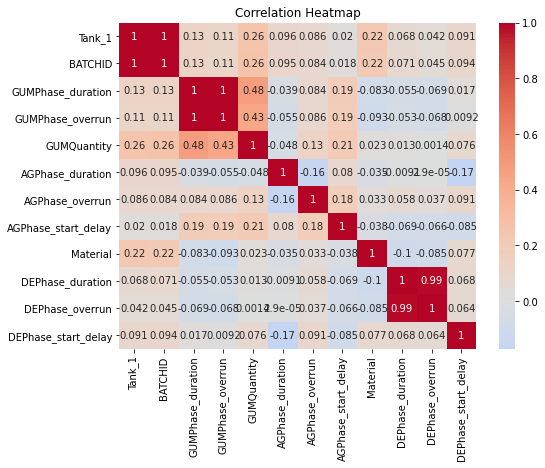

In [21]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Pairplot to visualize relationships between numerical columns
#sns.pairplot(df)
#plt.show()

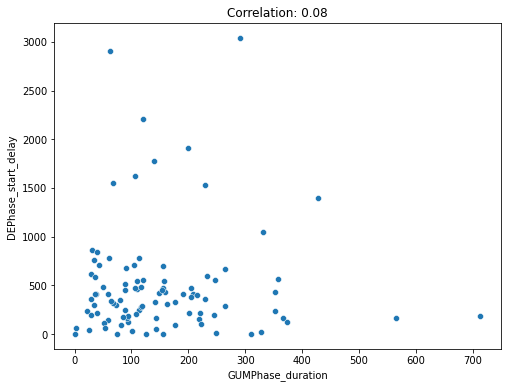

Correlation between GUMQuantity and DEPhase_start_delay: 0.08


In [22]:
# Calculate the correlation between GUMPhase_overrun and DEPhase_start_delay
correlation = df['GUMQuantity'].corr(df['DEPhase_start_delay'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GUMPhase_duration', y='DEPhase_start_delay')
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('GUMPhase_duration')
plt.ylabel('DEPhase_start_delay ')
plt.show()

print(f'Correlation between GUMQuantity and DEPhase_start_delay: {correlation:.2f}')

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df)

# Define features and target
X = df.drop(['DEPhase_start_delay'], axis=1)  # Features without the target variable
y = df['DEPhase_start_delay']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_

# Train the model with the best parameters on the full training data
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gb_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print best parameters and MSE
print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 1.1547138911014139


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.DataFrame(ProductionTank2510_df)

# Define features and target
X = df.drop(['DEPhase_start_delay'], axis=1)  # Features without the target variable
y = df['DEPhase_start_delay']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.1928959045614376
Mean Absolute Error: 0.8861616582481513
R-squared: -0.05399478014872816


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(ProductionTank2510_df)

# Drop the target variable and split data
X = df.drop(columns=["DEPhase_start_delay"])
y = df["DEPhase_start_delay"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Get predictions on the test set
preds = model.predict(X_test)

# Evaluate the model (For example, using Mean Squared Error)
mse = mean_squared_error(y_test, preds)



print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")



In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def train_svr(X_train, y_train):
    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    # Hyperparameters grid
    param_grid = {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
    
    # Using GridSearchCV to find the best hyperparameters
    svr = SVR()
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_svr = grid_search.best_estimator_
    return best_svr, scaler

def evaluate_svr(svr_model, scaler, X_test, y_test):
    X_test = scaler.transform(X_test)
    y_pred = svr_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SVR Predictions vs Actual Values')
    plt.show()

# Training the SVR model
best_svr, scaler = train_svr(X_train, y_train)

# Evaluating the trained SVR model
evaluate_svr(best_svr, scaler, X_test, y_test)


If SVR predicts a certain value for "deaeration start phase time delay" based on the input features for a given batch of beverage production, it's essentially telling you its best estimate of the delay for that batch based on the patterns it has learned from the training data.

If the prediction is accurate (or close to the actual delay), this suggests that the model has identified meaningful patterns in your input features that relate to the delay. Conversely, if predictions are off, the features might not contain enough information, the model may need better hyperparameters, or the data might require further preprocessing.

The advantage of using SVR (or any other machine learning model) for this task is that once trained, you can use it to make predictions for future batches, allowing you to potentially anticipate delays and make necessary adjustments in the production process to mitigate them.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(ProductionTank2510_df)

# Define features and target
X = df.drop("DEPhase_start_delay", axis=1)
y = df['DEPhase_start_delay']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=5000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.42
Mean Absolute Error (MAE): 0.89
R-squared (R2): -0.05


Epoch 1/50
2/2 [==============================] - 3s 756ms/step - loss: 1.1698 - mae: 0.9108 - val_loss: 0.6994 - val_mae: 0.6513
Epoch 2/50
2/2 [==============================] - 0s 292ms/step - loss: 1.0908 - mae: 0.8900 - val_loss: 0.7160 - val_mae: 0.6593
Epoch 3/50
2/2 [==============================] - 0s 291ms/step - loss: 1.0290 - mae: 0.8667 - val_loss: 0.7202 - val_mae: 0.6609
Epoch 4/50
2/2 [==============================] - 0s 305ms/step - loss: 0.9806 - mae: 0.8475 - val_loss: 0.7138 - val_mae: 0.6591
Epoch 5/50
2/2 [==============================] - 0s 337ms/step - loss: 0.9454 - mae: 0.8321 - val_loss: 0.7025 - val_mae: 0.6593
Epoch 6/50
2/2 [==============================] - 0s 167ms/step - loss: 0.9093 - mae: 0.8160 - val_loss: 0.6911 - val_mae: 0.6591
Epoch 7/50
2/2 [==============================] - 0s 309ms/step - loss: 0.8797 - mae: 0.8009 - val_loss: 0.6839 - val_mae: 0.6617
Epoch 8/50
2/2 [==============================] - 0s 419ms/step - loss: 0.8559 - mae: 0.78

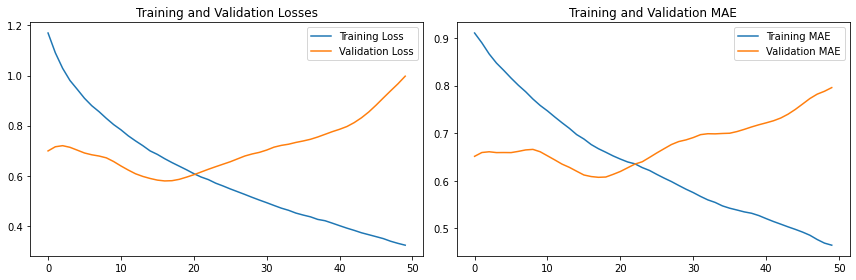

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset (replace with your actual dataset name)
# df = pd.DataFrame(ProductionTank22_df2)

df = pd.DataFrame(ProductionTank2510_df)

# Define features and target
X = df.drop("DEPhase_start_delay", axis=1)
y = df['DEPhase_start_delay']


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict with the model
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# If you'd like to visualize the training loss & MAE
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Losses')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Training and Validation MAE')

plt.tight_layout()
plt.show()